Show demos:

legacy file creation
rsmapper

simple python load
pandas python load

diffcalc calculation

https://github.com/DiamondLightSource/diffcalc-core/

https://jupyterhub.diamond.ac.uk/user/spc93/notebooks/link_to_dls_science_users_spc93/python/diffcalc_nexus_test.ipynb

## MMG NeXus Demo

### Data loader

1. Simple code (search for scan fields; no fixed location) [DLS only]
2. Complete case - create dict of all fields and attributes [any NeXus]
3. Function to find field (object) and its value, based on substring [any NeXus]; extra function to display
4. Update pdnx: create dataframe for scan and for metadata (with formatting). [DLS oly]

### Workflows

1. convert to legacy format
2. rsmapper
3. update UB matrix in diffcalc
4. re-run rsmapper
5. develop polarization code for general extended NXmx case (polarized intensity for charge scattering).

## Problems: 
- scan_fields includes names that do not exist as local_name attributes (e.g. 'total' should be 'pil3_100k.total')

## Next:
- pandas dataframe (but need to fix this first).

In [1]:
import h5py, pprint
from matplotlib.pyplot import *

'''
create small dictionary from selected datasets in a NeXus file with a particular attribute (e.g. local_name) which is used as a name
plus datasets with name specified in fieldnamelist (e.g. scan_fields)
'''
def dls_data_dict(nexus_file):
    attr, fieldnamelist = 'local_name', ['scan_fields', 'tthp']
    datasets = {}
    with h5py.File(nexus_file, 'r') as hdf:
        def func(address, obj):
            if attr in obj.attrs:
                try: # because some groups have this attribute
                    datasets[obj.attrs[attr].decode()] = obj[()] # convert to array or value
                except:
                    pass
            for field in fieldnamelist:
                if obj.name.split('/')[-1] == field:
                    try:
                        datasets[field] = [x.decode() for x in obj]
                    except:
                        datasets[field] = obj[()]
        hdf.visititems(func)
    return datasets



'''
create a dictionary from all the datasets in a NeXus file, with values and attributes
'''
def full_data_dict(nexus_file):
    datasets = {}
    with h5py.File(nexus_file, 'r') as hdf:
        def func(address, obj):
            if isinstance(obj, h5py.Dataset):
                datasets[obj.name]={}
                datasets[obj.name]['value'] = obj[()]
                for attr in obj.attrs:
                    datasets[obj.name][attr] = obj.attrs[attr]
        hdf.visititems(func)
    return datasets


'''
show fields in a NeXus file that contain sub-string
'''
def find_items(nexus_file, string):
    with h5py.File(nexus_file, 'r') as hdf:
        def func(address, obj):
            if string in obj.name:
                if isinstance(obj, h5py.Dataset):
                    print(obj.name, ':\t',  obj[()])
                else:
                    print(obj.name, ':\t',  'group')
        hdf.visititems(func)
    return


['eta' 'kphi' 'kap' 'kth' 'kmu' 'kdelta' 'kgam' 'delta_axis_offset'
 'TimeSec' 'TimeFromEpoch' 'ic1monitor' 'rc' 'count_time' 'filepath'
 'roi2.max_val' 'roi2.max_x' 'roi2.max_y' 'roi2.total' 'roi3.max_val'
 'roi3.max_x' 'roi3.max_y' 'roi3.total' 'max_val' 'max_x' 'max_y' 'total']


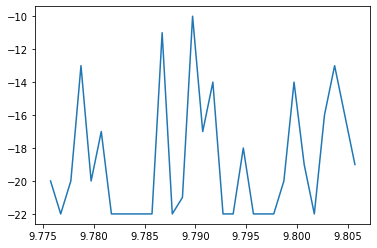

In [2]:

path = '/dls/i16/data/2023/cm33911-5/%i.nxs'
num = 1027749

file = path % num

dat1 = dls_data_dict(file)
print(dat1['scan_fields'])
figure()
plot(dat1['eta.eta'], dat1['pil3_100k.total'])

#### Problem: scan_fields includes names that do not exist as local_name attributes (e.g. 'total' should be 'pil3_100k.total')

#display(dat1)



In [3]:
dat2 = full_data_dict(file)

In [4]:
dat2['/entry1/before_scan/diffractometer_sample/gam']

{'value': 6.38113e-05, 'decimals': 5}

In [6]:
display(dat2)

{'/entry1/before_scan/PPR/ppchi': {'value': -45.274642327, 'decimals': 5},
 '/entry1/before_scan/PPR/pppiezo1': {'value': 0.0, 'decimals': 5},
 '/entry1/before_scan/PPR/pppiezo2': {'value': 12345.012359999999,
  'decimals': 5},
 '/entry1/before_scan/PPR/ppth1': {'value': 0.0003203382, 'decimals': 5},
 '/entry1/before_scan/PPR/ppth2': {'value': -5.66816e-05, 'decimals': 5},
 '/entry1/before_scan/PPR/ppz1': {'value': 6.0, 'decimals': 5},
 '/entry1/before_scan/PPR/ppz2': {'value': 8.0, 'decimals': 5},
 '/entry1/before_scan/Ta/Ta': {'value': 300.004, 'decimals': 2},
 '/entry1/before_scan/Tb/Tb': {'value': 301.108, 'decimals': 2},
 '/entry1/before_scan/Tc/Tc': {'value': 0.0, 'decimals': 2},
 '/entry1/before_scan/Tchannel/Tchannel': {'value': '0'},
 '/entry1/before_scan/Td/Td': {'value': 0.0, 'decimals': 2},
 '/entry1/before_scan/Theater/Theater': {'value': 6.0, 'decimals': 2},
 '/entry1/before_scan/Tsample/Tsample': {'value': 300.004, 'decimals': 2},
 '/entry1/before_scan/atime/TimeSec': {'

In [7]:
dat1['eta.eta']

array([9.77572089, 9.77672089, 9.77772089, 9.77872089, 9.77972089,
       9.78072089, 9.78172089, 9.78272089, 9.78372089, 9.78472089,
       9.78572089, 9.78672089, 9.78772089, 9.78872089, 9.78972089,
       9.79072089, 9.79172089, 9.79272089, 9.79372089, 9.79472089,
       9.79572089, 9.79672089, 9.79772089, 9.79872089, 9.79972089,
       9.80072089, 9.80172089, 9.80272089, 9.80372089, 9.80472089,
       9.80572089])

In [12]:
find_items(file, 'fields')

/entry1/diamond_scan/scan_fields :	 ['eta' 'kphi' 'kap' 'kth' 'kmu' 'kdelta' 'kgam' 'delta_axis_offset'
 'TimeSec' 'TimeFromEpoch' 'ic1monitor' 'rc' 'count_time' 'filepath'
 'roi2.max_val' 'roi2.max_x' 'roi2.max_y' 'roi2.total' 'roi3.max_val'
 'roi3.max_x' 'roi3.max_y' 'roi3.total' 'max_val' 'max_x' 'max_y' 'total']


In [13]:
find_items(file, 'kphi')

/entry1/before_scan/diffractometer_sample/kphi :	 65.45256
/entry1/before_scan/kphi :	 group
/entry1/before_scan/kphi/kphi :	 65.45256
/entry1/instrument/diffractometer_sample/kphi :	 65.45256
/entry1/instrument/kphi :	 group
/entry1/instrument/kphi/name :	 kphi
/entry1/instrument/kphi/soft_limit_max :	 271.0
/entry1/instrument/kphi/soft_limit_min :	 -91.0
/entry1/instrument/kphi/value :	 [65.45256 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256
 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256
 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256
 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256 65.45256]


In [8]:
dat1['pil3_100k.total']

array([-20, -22, -20, -13, -20, -17, -22, -22, -22, -22, -22, -11, -22,
       -21, -10, -17, -14, -22, -22, -18, -22, -22, -22, -20, -14, -19,
       -22, -16, -13, -16, -19])

In [9]:
display(dat1)

{'tthp': 0.930376,
 'scan_fields': array(['eta', 'kphi', 'kap', 'kth', 'kmu', 'kdelta', 'kgam',
        'delta_axis_offset', 'TimeSec', 'TimeFromEpoch', 'ic1monitor',
        'rc', 'count_time', 'filepath', 'roi2.max_val', 'roi2.max_x',
        'roi2.max_y', 'roi2.total', 'roi3.max_val', 'roi3.max_x',
        'roi3.max_y', 'roi3.total', 'max_val', 'max_x', 'max_y', 'total'],
       dtype=object),
 'PPR.ppchi': -45.274642327,
 'PPR.pppiezo1': 0.0,
 'PPR.pppiezo2': 12345.012359999999,
 'PPR.ppth1': 0.0003203382,
 'PPR.ppth2': -5.66816e-05,
 'PPR.ppz1': 6.0,
 'PPR.ppz2': 8.0,
 'Ta.Ta': 300.004,
 'Tb.Tb': 301.108,
 'Tc.Tc': 0.0,
 'Tchannel.Tchannel': '0',
 'Td.Td': 0.0,
 'Theater.Theater': 6.0,
 'atimetwo.TimeFromEpoch': array([1.70179015e+09, 1.70179016e+09, 1.70179016e+09, 1.70179016e+09,
        1.70179016e+09, 1.70179016e+09, 1.70179017e+09, 1.70179017e+09,
        1.70179017e+09, 1.70179017e+09, 1.70179017e+09, 1.70179018e+09,
        1.70179018e+09, 1.70179018e+09, 1.70179018e+09, 1.